In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
n_samples = 20


In [2]:
a = np.linspace(1,10,9).reshape([-1,3])

In [3]:
a[:,np.newaxis,0]

array([[1.   ],
       [4.375],
       [7.75 ]])

In [4]:
 X[:,np.newaxis,2].shape

(442, 1)

In [5]:
b = np.random.choice(np.linspace(10,200),10,replace=False)
b

array([ 17.75510204, 168.97959184, 161.2244898 , 176.73469388,
       172.85714286,  72.04081633,  68.16326531, 196.12244898,
       149.59183673, 106.93877551])

In [6]:
s = np.argsort(b)
s

array([0, 6, 5, 9, 8, 2, 1, 4, 3, 7], dtype=int64)

In [7]:
b[s]

array([ 17.75510204,  68.16326531,  72.04081633, 106.93877551,
       149.59183673, 161.2244898 , 168.97959184, 172.85714286,
       176.73469388, 196.12244898])

In [8]:
b[s[:2]]

array([17.75510204, 68.16326531])

In [9]:
b[[0,3]]

array([ 17.75510204, 176.73469388])

In [11]:

# Use only one feature and sort
X = X[:, np.newaxis, 2][:n_samples]
y = y[:n_samples]
p = X.argsort(axis=0)
X = X[p].reshape((n_samples, 1))
y = y[p]
print(X.shape,y.shape)

(20, 1) (20, 1)


(200, 1) (200, 1)


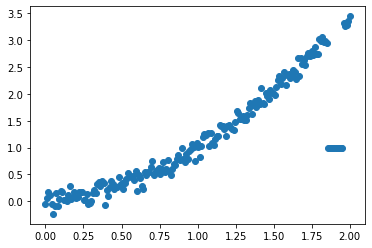

In [12]:
X = np.linspace(0,2,200).reshape([-1,1])
f = lambda x:np.sin(x) + np.cos(x**2)
f = lambda x:x**1.8

y = f(X)
y = y + np.random.normal(0,0.1,size=y.shape)
y.reshape([-1,1])
y[-15:-5] = 1
print(X.shape,y.shape)
plt.scatter(X,y)

In [13]:
polytrans = PolynomialFeatures(degree=2)

In [14]:
a = polytrans.fit_transform(X)

In [15]:
X.shape

(200, 1)

In [16]:
a.shape

(200, 3)

In [17]:
n_samples = y.shape[0]

(200, 1) (200, 1)


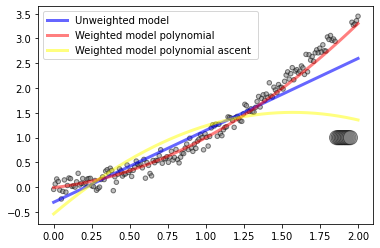

In [21]:

# Create equal weights and then augment the last 2 ones
sample_weight = np.ones(n_samples) * 20
sample_weight2 = np.copy(sample_weight)
sample_weight[-5:] *= 30
sample_weight2[-15:-5] *= 10
print(X.shape,y.shape)
plt.scatter(X, y, s=sample_weight2, c='grey', edgecolor='black',alpha=0.5)
# plt.scatter(X, y+1.5, s=sample_weight, c='springgreen', edgecolor='black',alpha=0.5)

# The unweighted model
regr = LinearRegression()
regr.fit(X, y)
plt.plot(X, regr.predict(X), color='blue', linewidth=3, label='Unweighted model',alpha=0.6)

# The weighted model
# regr = LinearRegression()
# regr.fit(X, y, sample_weight)
# plt.plot(X, regr.predict(X), color='red', linewidth=3, label='Weighted model',alpha=0.1)


# the weighted polynomial 
regr = LinearRegression()
regr.fit(a, y, sample_weight)
plt.plot(X, regr.predict(a), color='red', linewidth=3, label='Weighted model polynomial',alpha=0.5)

regr = LinearRegression()
regr.fit(a, y, sample_weight2)
plt.plot(X, regr.predict(a), color='yellow', linewidth=3, label='Weighted model polynomial ascent ',alpha=0.5)


# The weighted model - scaled weights
regr = LinearRegression()
sample_weight = sample_weight / sample_weight.max()
regr.fit(X, y, sample_weight)
# plt.plot(X, regr.predict(X), color='deeppink', linewidth=2, label='Weighted model - scaled',alpha=0.1)
# plt.xticks(())
# plt.yticks(())
plt.legend()